In [1]:
!pip install pandas_datareader


In [2]:
import pandas_datareader as pdr
key=""
ticker='GOOGL'

In [3]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
filename=ticker+'.csv'
df.to_csv(filename)


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv(filename)

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2019-01-08 00:00:00+00:00,1085.37,1093.35,1068.35,1086.00,1770654,54.2685,54.6675,53.4175,54.3000,35413080,0.0,1.0
1,GOOGL,2019-01-09 00:00:00+00:00,1081.65,1091.64,1074.37,1087.99,1349912,54.0825,54.5820,53.7185,54.3995,26998240,0.0,1.0
2,GOOGL,2019-01-10 00:00:00+00:00,1078.83,1079.81,1064.68,1074.94,1329861,53.9415,53.9905,53.2340,53.7470,26597220,0.0,1.0
3,GOOGL,2019-01-11 00:00:00+00:00,1064.47,1073.37,1056.43,1069.90,1543238,53.2235,53.6685,52.8215,53.4950,30864760,0.0,1.0
4,GOOGL,2019-01-14 00:00:00+00:00,1051.51,1058.45,1048.55,1053.34,1424486,52.5755,52.9225,52.4275,52.6670,28489720,0.0,1.0


In [8]:
df1=df.reset_index()['adjClose']

In [9]:
df1

0        54.2685
1        54.0825
2        53.9415
3        53.2235
4        52.5755
          ...   
1253    139.6900
1254    138.1700
1255    138.9200
1256    136.3900
1257    135.7300
Name: adjClose, Length: 1258, dtype: float64

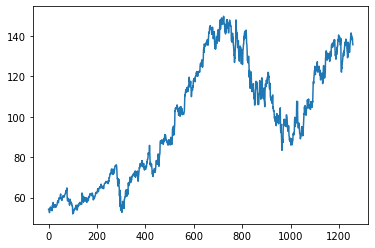

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.02381475],
       [0.02191488],
       [0.02047466],
       ...,
       [0.88847464],
       [0.86263234],
       [0.85589087]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data


array([[0.02381475],
       [0.02191488],
       [0.02047466],
       [0.01314076],
       [0.00652186],
       [0.02439697],
       [0.02592912],
       [0.03083712],
       [0.03501479],
       [0.02037252],
       [0.02332446],
       [0.02311507],
       [0.03205773],
       [0.0210007 ],
       [0.01599567],
       [0.03026001],
       [0.04450902],
       [0.04079611],
       [0.05244046],
       [0.05777746],
       [0.04297687],
       [0.03430489],
       [0.03250206],
       [0.03236927],
       [0.04537213],
       [0.04590839],
       [0.0461995 ],
       [0.04131193],
       [0.04482567],
       [0.04180222],
       [0.03343667],
       [0.03974403],
       [0.04013728],
       [0.04252744],
       [0.04297687],
       [0.0448461 ],
       [0.05606656],
       [0.05856907],
       [0.06662309],
       [0.06445254],
       [0.05725653],
       [0.0568071 ],
       [0.07176601],
       [0.08095382],
       [0.08187821],
       [0.07854323],
       [0.07740433],
       [0.076

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 24s 664ms/step - loss: 0.0896 - val_loss: 0.0059
Epoch 2/100
12/12 [==============================] - 4s 341ms/step - loss: 0.0098 - val_loss: 0.0144
Epoch 3/100
12/12 [==============================] - 4s 346ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 4s 343ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 4s 355ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 6/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0019 - val_loss: 0.0054
Epoch 7/100
12/12 [==============================] - 4s 344ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 4s 338ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 4s 334ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 4s 329ms/step - loss: 0.0018 - val_l

12/12 [==============================] - 4s 304ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 82/100
12/12 [==============================] - 4s 315ms/step - loss: 9.9691e-04 - val_loss: 0.0017
Epoch 83/100
12/12 [==============================] - 4s 329ms/step - loss: 8.7122e-04 - val_loss: 0.0022
Epoch 84/100
12/12 [==============================] - 4s 318ms/step - loss: 8.2201e-04 - val_loss: 0.0016
Epoch 85/100
12/12 [==============================] - 4s 310ms/step - loss: 8.6805e-04 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 4s 315ms/step - loss: 8.0430e-04 - val_loss: 0.0018
Epoch 87/100
12/12 [==============================] - 4s 317ms/step - loss: 8.0097e-04 - val_loss: 0.0017
Epoch 88/100
12/12 [==============================] - 4s 317ms/step - loss: 7.9681e-04 - val_loss: 0.0017
Epoch 89/100
12/12 [==============================] - 4s 318ms/step - loss: 9.2440e-04 - val_loss: 0.0023
Epoch 90/100
12/12 [==============================] - 4s 326ms/

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.11.0'

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 61ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

97.7882442519857

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

113.59623184834979

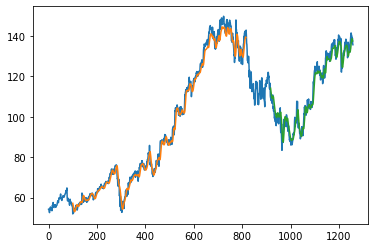

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8109477382879731,
 0.7951154987410816,
 0.7840840027987312,
 0.796545507474349,
 0.771418211161218,
 0.7807132679274575,
 0.7879654550747435,
 0.8215706603065325,
 0.7951154987410816,
 0.7961369335505584,
 0.807679146897647,
 0.8440422261150236,
 0.8574230221191705,
 0.8603851830666536,
 0.8551758655383215,
 0.8562994438287461,
 0.8429186478245991,
 0.851090126300414,
 0.862530196166555,
 0.86804594413773,
 0.8519072741479956,
 0.8659009310378287,
 0.8800988748895571,
 0.8729488312232192,
 0.8812224531799819,
 0.8794860140038709,
 0.8355643171963658,
 0.8018569684836288,
 0.7999162423456228,
 0.808700581707124,
 0.7827050658059376,
 0.8028784032931056,
 0.8209577994208463,
 0.8061469946834319,
 0.8399564868771161,
 0.8221835211922186,
 0.8508858393385188,
 0.849149400162408,
 0.8747874138802776,
 0.8833674662798832,
 0.8796903009657666,
 0.9051240277217407,
 0.8889853577320059,
 0.8725402572994285,
 0.890262151243852,
 0.8966461188030825,
 0.8786688661562898,
 0.8765238530563881,
 0

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.7951155  0.784084   0.79654551 0.77141821 0.78071327 0.78796546
 0.82157066 0.7951155  0.79613693 0.80767915 0.84404223 0.85742302
 0.86038518 0.85517587 0.85629944 0.84291865 0.85109013 0.8625302
 0.86804594 0.85190727 0.86590093 0.88009887 0.87294883 0.88122245
 0.87948601 0.83556432 0.80185697 0.79991624 0.80870058 0.78270507
 0.8028784  0.8209578  0.80614699 0.83995649 0.82218352 0.85088584
 0.8491494  0.87478741 0.88336747 0.8796903  0.90512403 0.88898536
 0.87254026 0.89026215 0.89664612 0.87866887 0.87652385 0.854563
 0.86375592 0.88735106 0.75252167 0.71850789 0.71738431 0.74077517
 0.73689371 0.76110172 0.77172464 0.78816974 0.79991624 0.80727057
 0.81615706 0.7998141  0.82381782 0.81871064 0.8343386  0.84455294
 0.86814809 0.85160084 0.86120233 0.86855666 0.88408247 0.86569664
 0.86283663 0.87090596 0.84833225 0.82320496 0.81636134 0.78990618
 0.80747486 0.79756694 0.86814809 0.84833225 0.83096786 0.82310281
 0.82361353 0.81717849 0.82391996 0.85660587 0.865288

7 day output [[0.82124174]]
8 day input [0.79613693 0.80767915 0.84404223 0.85742302 0.86038518 0.85517587
 0.85629944 0.84291865 0.85109013 0.8625302  0.86804594 0.85190727
 0.86590093 0.88009887 0.87294883 0.88122245 0.87948601 0.83556432
 0.80185697 0.79991624 0.80870058 0.78270507 0.8028784  0.8209578
 0.80614699 0.83995649 0.82218352 0.85088584 0.8491494  0.87478741
 0.88336747 0.8796903  0.90512403 0.88898536 0.87254026 0.89026215
 0.89664612 0.87866887 0.87652385 0.854563   0.86375592 0.88735106
 0.75252167 0.71850789 0.71738431 0.74077517 0.73689371 0.76110172
 0.77172464 0.78816974 0.79991624 0.80727057 0.81615706 0.7998141
 0.82381782 0.81871064 0.8343386  0.84455294 0.86814809 0.85160084
 0.86120233 0.86855666 0.88408247 0.86569664 0.86283663 0.87090596
 0.84833225 0.82320496 0.81636134 0.78990618 0.80747486 0.79756694
 0.86814809 0.84833225 0.83096786 0.82310281 0.82361353 0.81717849
 0.82391996 0.85660587 0.86528807 0.88255032 0.90379616 0.91472551
 0.91503195 0.90328545 0

16 day output [[0.81030554]]
17 day input [0.8625302  0.86804594 0.85190727 0.86590093 0.88009887 0.87294883
 0.88122245 0.87948601 0.83556432 0.80185697 0.79991624 0.80870058
 0.78270507 0.8028784  0.8209578  0.80614699 0.83995649 0.82218352
 0.85088584 0.8491494  0.87478741 0.88336747 0.8796903  0.90512403
 0.88898536 0.87254026 0.89026215 0.89664612 0.87866887 0.87652385
 0.854563   0.86375592 0.88735106 0.75252167 0.71850789 0.71738431
 0.74077517 0.73689371 0.76110172 0.77172464 0.78816974 0.79991624
 0.80727057 0.81615706 0.7998141  0.82381782 0.81871064 0.8343386
 0.84455294 0.86814809 0.85160084 0.86120233 0.86855666 0.88408247
 0.86569664 0.86283663 0.87090596 0.84833225 0.82320496 0.81636134
 0.78990618 0.80747486 0.79756694 0.86814809 0.84833225 0.83096786
 0.82310281 0.82361353 0.81717849 0.82391996 0.85660587 0.86528807
 0.88255032 0.90379616 0.91472551 0.91503195 0.90328545 0.90185544
 0.89633969 0.88081388 0.88847464 0.86263234 0.85589087 0.85797769
 0.85019201 0.8435047

24 day output [[0.8076863]]
25 day input [0.83556432 0.80185697 0.79991624 0.80870058 0.78270507 0.8028784
 0.8209578  0.80614699 0.83995649 0.82218352 0.85088584 0.8491494
 0.87478741 0.88336747 0.8796903  0.90512403 0.88898536 0.87254026
 0.89026215 0.89664612 0.87866887 0.87652385 0.854563   0.86375592
 0.88735106 0.75252167 0.71850789 0.71738431 0.74077517 0.73689371
 0.76110172 0.77172464 0.78816974 0.79991624 0.80727057 0.81615706
 0.7998141  0.82381782 0.81871064 0.8343386  0.84455294 0.86814809
 0.85160084 0.86120233 0.86855666 0.88408247 0.86569664 0.86283663
 0.87090596 0.84833225 0.82320496 0.81636134 0.78990618 0.80747486
 0.79756694 0.86814809 0.84833225 0.83096786 0.82310281 0.82361353
 0.81717849 0.82391996 0.85660587 0.86528807 0.88255032 0.90379616
 0.91472551 0.91503195 0.90328545 0.90185544 0.89633969 0.88081388
 0.88847464 0.86263234 0.85589087 0.85797769 0.85019201 0.84350473
 0.83770227 0.83263916 0.82823592 0.82444853 0.82124174 0.81857622
 0.81640548 0.81467652 

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1258

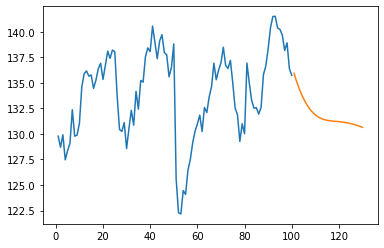

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [40]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.7951155  0.784084   0.79654551 0.77141821 0.78071327 0.78796546
 0.82157066 0.7951155  0.79613693 0.80767915 0.84404223 0.85742302
 0.86038518 0.85517587 0.85629944 0.84291865 0.85109013 0.8625302
 0.86804594 0.85190727 0.86590093 0.88009887 0.87294883 0.88122245
 0.87948601 0.83556432 0.80185697 0.79991624 0.80870058 0.78270507
 0.8028784  0.8209578  0.80614699 0.83995649 0.82218352 0.85088584
 0.8491494  0.87478741 0.88336747 0.8796903  0.90512403 0.88898536
 0.87254026 0.89026215 0.89664612 0.87866887 0.87652385 0.854563
 0.86375592 0.88735106 0.75252167 0.71850789 0.71738431 0.74077517
 0.73689371 0.76110172 0.77172464 0.78816974 0.79991624 0.80727057
 0.81615706 0.7998141  0.82381782 0.81871064 0.8343386  0.84455294
 0.86814809 0.85160084 0.86120233 0.86855666 0.88408247 0.86569664
 0.86283663 0.87090596 0.84833225 0.82320496 0.81636134 0.78990618
 0.80747486 0.79756694 0.86814809 0.84833225 0.83096786 0.82310281
 0.82361353 0.81717849 0.82391996 0.85660587 0.86528807 0.8825503

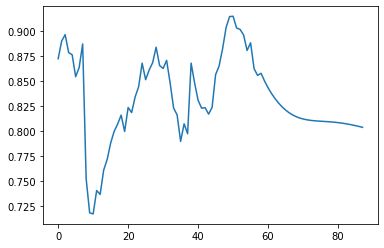

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

In [43]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [44]:
df=pd.read_csv("data.csv")

In [45]:
df.to_json(orient='values')

'[[0,137.36],[1,139.095],[2,139.72],[3,137.96],[4,137.75],[5,135.6],[6,136.5],[7,138.81],[8,125.61],[9,122.28],[10,122.17],[11,124.46],[12,124.08],[13,126.45],[14,127.49],[15,129.1],[16,130.25],[17,130.97],[18,131.84],[19,130.24],[20,132.59],[21,132.09],[22,133.62],[23,134.62],[24,136.93],[25,135.31],[26,136.25],[27,136.97],[28,138.49],[29,136.69],[30,136.41],[31,137.2],[32,134.99],[33,132.53],[34,131.86],[35,129.27],[36,130.99],[37,130.02],[38,136.93],[39,134.99],[40,133.29],[41,132.52],[42,132.57],[43,131.94],[44,132.6],[45,135.8],[46,136.65],[47,138.34],[48,140.42],[49,141.49],[50,141.52],[51,140.37],[52,140.23],[53,139.69],[54,138.17],[55,138.92],[56,136.39],[57,135.73],[58,135.9343026523],[59,135.1720731064],[60,134.5173780193],[61,133.9493092096],[62,133.4536225046],[63,133.0225393374],[64,132.6517473589],[65,132.3377978573],[66,132.076839479],[67,131.8643206244],[68,131.6950536369],[69,131.5633723586],[70,131.4633772162],[71,131.3892386608],[72,131.3352613576],[73,131.2961759547

In [46]:
df3=scaler.inverse_transform(df3).tolist()

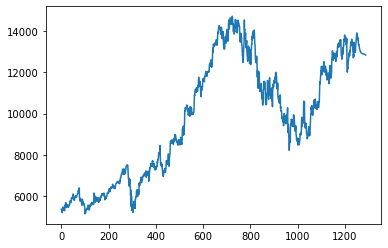

In [47]:
plt.plot(df3)